In [6]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API Key
weather_key = os.environ.get('weather_api')
# Incorporate Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []
# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)
# Print city count 
len(cities)

637

In [4]:
# Get Weather Data
weather_api_key = "weather_key"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "cod": "404",
    "message": "city not found"
}


In [5]:
print(requests.get(query_url + city))

<Response [404]>


In [21]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Retreiving Data")
print(f"................")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:
# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing record {processing_record} | {city_record}")
        processing_record += 1
        
    except:
        print("not found") 
    continue
# Print End Statement
print(f"........................")
print(f"Data Retrieval Complete")

Retreiving Data
................
Processing record 1 | Rikitea
Processing record 2 | Tabou
Processing record 3 | Busselton
Processing record 4 | Leh
Processing record 5 | Norman Wells
Processing record 6 | Al Bardīyah
Processing record 7 | Vaini
Processing record 8 | Miramar
Processing record 9 | Kaitangata
Processing record 10 | Yerbogachën
Processing record 11 | Bluff
Processing record 12 | George Town
Processing record 13 | Vardø
Processing record 14 | Saskylakh
Processing record 15 | Kastamonu Province
Processing record 16 | Lüderitz
Processing record 17 | Nishihara
Processing record 18 | Igrim
Processing record 19 | Lorengau
Processing record 20 | Koumac
Processing record 21 | Mataura
Processing record 22 | Upernavik
Processing record 23 | Astorga
Processing record 24 | Boddam
Processing record 25 | Longyearbyen
Processing record 26 | Ushuaia
Processing record 27 | Laguna
Processing record 28 | Katangli
Processing record 29 | Faanui
Processing record 30 | Amapá
Processing record 3

Processing record 243 | Chegdomyn
Processing record 244 | Hamilton
Processing record 245 | Tautira
Processing record 246 | Arraial do Cabo
Processing record 247 | Ekibastuz
not found
Processing record 248 | Longfeng
Processing record 249 | Srednekolymsk
Processing record 250 | Wiwilí
Processing record 251 | Domoni
Processing record 252 | Atherton
Processing record 253 | Isangel
Processing record 254 | Jacareacanga
Processing record 255 | Keti Bandar
Processing record 256 | Forsytheganj
Processing record 257 | Łapy
Processing record 258 | Airai
Processing record 259 | Kattivākkam
Processing record 260 | Freeport
not found
Processing record 261 | Quatre Cocos
Processing record 262 | Cockburn Town
Processing record 263 | Matara
not found
Processing record 264 | Voorhout
Processing record 265 | Grand Gaube
Processing record 266 | Monteagudo
Processing record 267 | Varhaug
Processing record 268 | Marsá Maţrūḩ
Processing record 269 | Chikwawa
Processing record 270 | Khani
Processing record 2

Processing record 483 | Shahr-e Kord
Processing record 484 | Kanniyākumāri
Processing record 485 | Gorontalo
Processing record 486 | Bryanka
Processing record 487 | Karasjok
Processing record 488 | Brae
not found
Processing record 489 | Lebedyn
Processing record 490 | Gobabis
Processing record 491 | Jiaozuo
Processing record 492 | Urcos
Processing record 493 | Garden City
Processing record 494 | Neubrandenburg
Processing record 495 | Dharmadam
Processing record 496 | Conceição do Araguaia
not found
Processing record 497 | Victor Harbor
Processing record 498 | Aquidauana
Processing record 499 | Te Anau
Processing record 500 | San Juan
Processing record 501 | Urgut
Processing record 502 | Terrace
Processing record 503 | Kulunda
Processing record 504 | Zhigansk
not found
Processing record 505 | Bonfim
Processing record 506 | Otta
Processing record 507 | Mago
Processing record 508 | Polunochnoye
not found
Processing record 509 | San Patricio
Processing record 510 | Pangkalanbuun
Processing

In [12]:
# Create DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               576
Country            576
Date               576
Latitude           576
Longitude          576
Max Temperature    576
Humidity           576
Cloudiness         576
Wind Speed         576
dtype: int64

In [13]:
#dataframe
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,1604460919,-23.12,-134.97,72.70,81,18,18.95
1,Tabou,CI,1604460919,4.42,-7.35,78.15,88,12,8.08
2,Busselton,AU,1604460919,-33.65,115.33,72.00,35,67,7.40
3,Leh,IN,1604460919,34.17,77.58,32.63,66,68,2.44
4,Norman Wells,CA,1604460782,65.28,-126.83,-2.20,77,75,3.36


In [14]:
#output data to csv
weather_data.to_csv("./data/weather_data.csv")

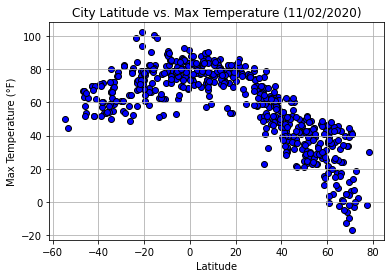

In [11]:
# latitude and max temp scatter plot 
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (11/02/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./data/City_Latitude_vs_Max_Temperature.png")
plt.show()

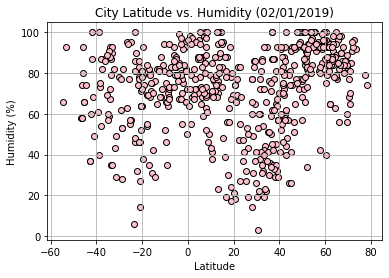

In [15]:
#latitude and humidity scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="pink", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")
plt.show()

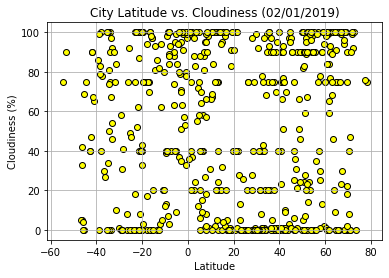

In [19]:
# latitude and cloudiness scatter plot 
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="yellow", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")
plt.show()

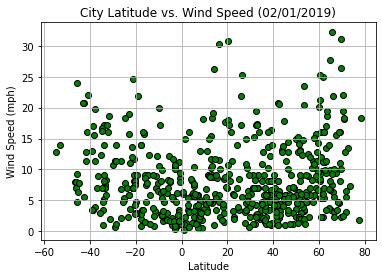

In [20]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="green", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")
plt.show()